In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv1 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv'
csv2 = 'https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv'
df_junho = pd.read_csv(csv1, sep = ';')
df_julho = pd.read_csv(csv2, sep = ';')

In [3]:
df_junho.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49737 entries, 0 to 49736
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região - Sigla     49737 non-null  object 
 1   Estado - Sigla     49737 non-null  object 
 2   Município          49737 non-null  object 
 3   Revenda            49737 non-null  object 
 4   CNPJ da Revenda    49737 non-null  object 
 5   Nome da Rua        49737 non-null  object 
 6   Número Rua         49714 non-null  object 
 7   Complemento        10052 non-null  object 
 8   Bairro             49613 non-null  object 
 9   Cep                49737 non-null  object 
 10  Produto            49737 non-null  object 
 11  Data da Coleta     49737 non-null  object 
 12  Valor de Venda     49737 non-null  object 
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  49737 non-null  object 
 15  Bandeira           49737 non-null  object 
dtypes: float64(1), object(

In [109]:
df_junho.tail()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
49732,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,GASOLINA,27/06/2021,5.59,NaN,R$ / litro,BRANCA
49733,NE,PE,VITORIA DE SANTO ANTAO,OLIVEIRA E SILVA POSTOS LTDA,35.228.711/0001-00,AVENIDA HENRIQUE DE HOLANDA,S/N,ANEXO 01,REDENCAO,55612-025,ETANOL,27/06/2021,4.72,NaN,R$ / litro,BRANCA
49734,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA,28/06/2021,5.67,NaN,R$ / litro,BRANCA
49735,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,ETANOL,28/06/2021,4.79,NaN,R$ / litro,BRANCA
49736,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,AVENIDA CORONEL VENANCIO FLORES,28,NaN,CENTRO,29190-010,GASOLINA ADITIVADA,28/06/2021,5.67,NaN,R$ / litro,BRANCA


In [125]:
df_junho['Valor de Venda'].value_counts()

5.499    1761
5.599    1757
5.399    1511
5.299    1415
5.699    1408
         ... 
6.167       1
5.983       1
3.887       1
4.692       1
4.802       1
Name: Valor de Venda, Length: 1276, dtype: int64

In [76]:
df_junho['Região - Sigla'].value_counts()

SE    26068
NE     9151
S      7869
CO     4184
N      2465
Name: Região - Sigla, dtype: int64

# Limpeza dos Dados

## Alterando o tipo de data de object para datetime da coluna Data da Coleta

In [ ]:
df_junho['Data da Coleta'] = pd.to_datetime(df_junho['Data da Coleta'],format='%d/%m/%Y', infer_datetime_format=False)

## Transformando a coluna 'Valor de Compra' para float 

Alterando (virgula) para (ponto)

In [100]:
df_junho['Valor de Venda'] = df_junho['Valor de Venda'].apply(lambda x: x.replace(',', '.'))

Alterando o tipo de dado para float

In [101]:
df_junho['Valor de Venda'] = df_junho['Valor de Venda'].astype('float')

In [123]:
df_analise = df_junho[['Data da Coleta', 'Valor de Venda']].groupby(by = 'Data da Coleta').mean().reset_index()
df_analise.head()

,Data da Coleta,Valor de Venda
0,2021-06-01,5.295779
1,2021-06-02,5.287546
2,2021-06-03,5.440103
3,2021-06-04,5.514117
4,2021-06-06,5.471342


Text(0.5, 1.0, 'Valor de Venda da Gasolina em 2021')

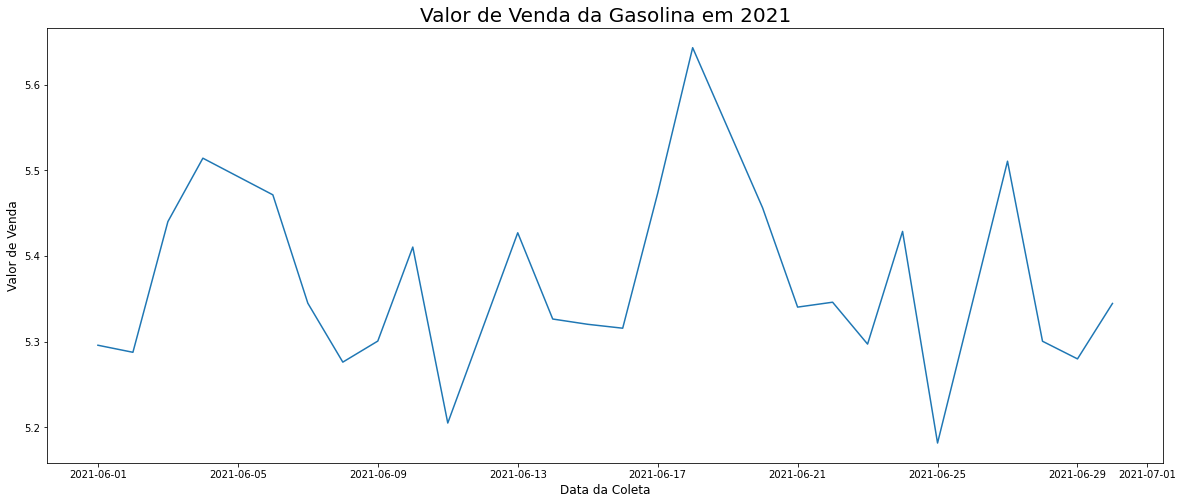

In [124]:
plt.figure(figsize=(20, 8))
plt.plot('Data da Coleta', 'Valor de Venda', data = df_analise)
plt.xlabel('Data da Coleta', fontsize = 12.0)
plt.ylabel('Valor de Venda', fontsize = 12.0)
plt.title('Valor de Venda da Gasolina em 2021', fontsize = 20.0)

# EDA

2) Qual o preço médio da gasolina e do etanol nesses dois meses?

In [52]:
print(df_junho.query('Produto == "GASOLINA" | Produto == "GASOLINA ADITIVADA"')['Valor de Venda'].mean())
print(df_junho.query('Produto == "ETANOL"')['Valor de Venda'].mean())

5.734489270779255
4.576388725259197


3) Quais os 5 estados com o preço médio da gasolina e do etanol mais
caros?

In [59]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "GASOLINA"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False).head()

,,Valor de Venda
Estado - Sigla,Produto,
AC,GASOLINA,6.427822
RJ,GASOLINA,6.247823
RN,GASOLINA,6.023631
PI,GASOLINA,6.009387
GO,GASOLINA,5.963309


In [60]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "ETANOL"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False).head()

,,Valor de Venda
Estado - Sigla,Produto,
RS,ETANOL,5.780716
AC,ETANOL,5.525723
RN,ETANOL,5.524468
RJ,ETANOL,5.344081
PA,ETANOL,5.271023


4) Qual o preço médio da gasolina e do etanol por estado?

In [ ]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "GASOLINA"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False)

In [ ]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "ETANOL"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False)

5) Qual o município que possui o menor preço para a gasolina e para o
etanol?

In [67]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "GASOLINA"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda').head(1)

,,Valor de Venda
Estado - Sigla,Produto,
AP,GASOLINA,4.933375


In [65]:
df_junho[['Estado - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "ETANOL"').groupby(by = ['Estado - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda').head(1)

,,Valor de Venda
Estado - Sigla,Produto,
MT,ETANOL,4.114189


6) Qual o município que possui o maior preço para a gasolina e para o
etanol?

In [69]:
df_junho[['Município', 'Produto', 'Valor de Venda']].query('Produto == "GASOLINA"').groupby(by = ['Município', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False).head(1)

,,Valor de Venda
Município,Produto,
CRUZEIRO DO SUL,GASOLINA,6.879583


In [70]:
df_junho[['Município', 'Produto', 'Valor de Venda']].query('Produto == "ETANOL"').groupby(by = ['Município', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False).head(1)

,,Valor de Venda
Município,Produto,
BAGE,ETANOL,6.504625


7) Qual a região que possui o maior valor médio da gasolina?

In [71]:
df_junho[['Região - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "GASOLINA"').groupby(by = ['Região - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda', ascending=False).head(1)

,,Valor de Venda
Região - Sigla,Produto,
CO,GASOLINA,5.811425


8) Qual a região que possui o menor valor médio do etanol?

In [75]:
df_junho[['Região - Sigla', 'Produto', 'Valor de Venda']].query('Produto == "ETANOL"').groupby(by = ['Região - Sigla', 'Produto']).mean().sort_values(by = 'Valor de Venda').head(1)

,,Valor de Venda
Região - Sigla,Produto,
SE,ETANOL,4.376493


9) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a
região onde ele é vendido?

,Valor de Venda,Valor de Compra
Valor de Venda,1.0,NaN
Valor de Compra,NaN,NaN


10) Há alguma correlação entre o valor do combustível (gasolina e etanol) e a
bandeira que vende ele?